In [4]:
import json
import sys

import pandas as pd  # noqa: I001


sys.path.append("../src/bcc_model/")

from v1.blue_carbon_project import BlueCarbonProject
from v1.sensitivity_analysis import plot_sensitivity_analysis
from v1.utils import generate_master_table

In [5]:
# Import excel with the import datai
data_path = "../excel/Carbon-Cost Data Upload.xlsm"


In [6]:
master_table = generate_master_table(data_path)
# Open the excel file - tab 'Base_size_table'
base_size = pd.read_excel(data_path, sheet_name="Base_size_table")

# Open the excel file - tab 'Base_increase'
base_increase = pd.read_excel(data_path, sheet_name="Base_increase")

In [16]:
master_table

,country,country_code,activity,ecosystem,size_ha,feasibility_analysis_cost,planning_and_admin_cost,data_collection_and_field_cost,community_representation_liaison_cost,blue_carbon_project_planning_cost,...,extent,extent_historic,unprotected_extent,loss_rate,restorable_land,tier_1_ipcc_default_value,tier_2_country_specific_rate,tier_1_global_emission_factor,tier_2_country_specific_emission_factor_agb,tier_2_country_specific_emission_factor_soc
0,United States,USA,Restoration,Mangrove,500,100000,166766.666667,26666.666667,126500.000000,100000,...,42057.40171,231272.5243,20077.3163,-0.008868,9665.780512,5.940000,17.2349,27.20,55.227609,58.002081
1,Indonesia,IDN,Restoration,Mangrove,500,50000,166766.666667,26666.666667,71183.333333,100000,...,2901690.307,2930508.086,2028220.962,-0.003716,204536.1679,5.940000,29.5,27.20,355.398394,71.876642
2,Australia,AUS,Restoration,Mangrove,500,70000,166766.666667,26666.666667,113016.666667,115000,...,1004148.846,1013552.136,482831.9666,-0.001498,69160.39725,5.940000,7.285,27.20,197.881108,59.762089
3,The Bahamas,BHS,Restoration,Mangrove,500,70000,166766.666667,26666.666667,103100.000000,125000,...,150839.0825,144788.5852,34035.8866,-0.007321,9842.169833,5.940000,7.5,27.20,21.830982,107.946528
4,Kenya,KEN,Restoration,Mangrove,500,50000,166766.666667,26666.666667,66050.000000,100000,...,54121.50058,54080.01031,44742.4502,-0.002781,1609.6981,5.940000,19,27.20,91.779817,79.040056
5,Mexico,MEX,Restoration,Mangrove,500,50000,166766.666667,26666.666667,72600.000000,100000,...,991795.5053,988644.5558,240725.4107,-0.005467,68640.05609,5.940000,18.33333,27.20,63.192687,74.909655
6,Colombia,COL,Restoration,Mangrove,500,50000,166766.666667,26666.666667,64804.833333,100000,...,278965.0541,277948.7838,120497.1428,-0.003868,10207.48808,5.940000,5.94,27.20,213.996345,45.100594
7,India,IND,Restoration,Mangrove,500,50000,166766.666667,26666.666667,67633.333333,100000,...,399901.5243,399155.482,270255.3597,-0.00159,17738.74347,5.940000,12.08,27.20,67.730353,85.461148
8,China,CHN,Restoration,Mangrove,500,50000,166766.666667,26666.666667,83233.333333,100000,...,21612.97876,20602.88038,13208.9552,-0.000257,4614.791406,5.940000,5.683333,27.20,138.281866,110.337661
9,United States,USA,Restoration,Seagrass,500,100000,166766.666667,26666.666667,126500.000000,100000,...,1394022.969,NoData,NoData,-0.026,64125.05657,1.576667,NoData,3.39,NoData,NoData


In [7]:
project_parameters = {
    "project_name": "Test Project",
    "project_setup": {
        "project_size_ha": 250,
        "activity": "Restoration",
        "ecosystem": "Mangrove",
        "country": "Australia",
        "carbon_price": 15,
        "carbon_revenues_to_cover": "Opex",
        "restoration_activity": "Planting",
        "sequestration_rate_used": "Tier 2 - Country-specific rate",
        "project_specific_sequestration_rate": None,
        "planting_success_rate": 0.8,
        # loss_rate_used="National average",  # ['National average', 'project-specific']
        # project_specific_loss_rate=-0.1, # -0.10% loss rate
        # emission_factor_used="Tier 2 - Country-specific emission factor",
        # ['Tier 1 - Global emission factor', 'Tier 2 - Country-specific emission factor',
        #  'Tier 3 - Project specific emission factor']
        # tier_3_project_specific_emission="AGB and SOC separately",
        # ['One emission factor', 'AGB and SOC separately']
        # tier_3_project_specific_emission_one_factor=0.5,
        # tier_3_emission_factor_AGB=0.5,
        # tier_3_emission_factor_SOC=0.5
    },
}

In [8]:
project_name = "Restoration_Mangrove_Colombia"
# Example usage for a restoration project
project = BlueCarbonProject(
    master_table=master_table,
    base_size=base_size,
    base_increase=base_increase,
    **project_parameters["project_setup"],
)


## Sensitivity Analysis (±25%)

,Cost Input,Min % Change,Max % Change,Base params,Base Cost per tCO2e,Min Cost per tCO2e,Max Cost per tCO2e
0,feasibility_analysis,-0.286404,0.285586,70000.000000,262.107932,261.357246,262.858618
1,conservation_planning_and_admin,-2.575829,2.511146,166766.666667,262.107932,255.356481,268.859384
2,data_collection_and_field_cost,-0.314891,0.313902,26666.666667,262.107932,261.282579,262.933285
3,community_representation,-1.283217,1.266959,113016.666667,262.107932,258.744519,265.471345
4,blue_carbon_project_planning,-0.418291,0.416548,115000.000000,262.107932,261.011559,263.204305
5,establishing_carbon_rights,-1.362507,1.344192,120000.000000,262.107932,258.536693,265.679171
6,financing_cost,-0.000000,0.000000,0.050000,262.107932,262.107932,262.107932
7,validation,-0.181865,0.181535,50000.000000,262.107932,261.631248,262.584616
8,implementation_labor,-10.075790,9.153502,9000.000000,262.107932,235.698488,288.517376
9,monitoring,-1.987176,1.948456,40200.000000,262.107932,256.899387,267.316477


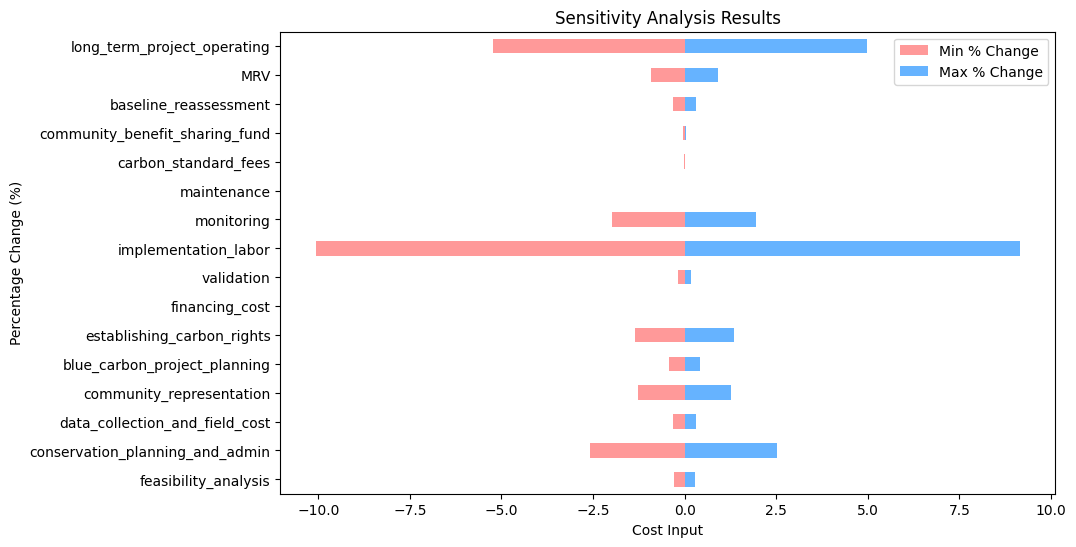

In [9]:
plot_sensitivity_analysis(project)